Plato workbook

In [56]:
import pandas as pd

from core.core import Core, load_data

In [57]:
core = Core()

Generating Data using core

Note: generated data is saved to generated_data.csv by default




In [58]:
# Corrected Code
core.generate_data(num_rows=1000, columns=[
    {"name": "age", "data_type": "int", "options": {"min": 18, "max": 75}},
    {"name": "name", "data_type": "name"},
    {"name": "email", "data_type": "email"},
    {"name": "address", "data_type": "address"},
    {"name": "phone", "data_type": "phone"},
    {"name": "company", "data_type": "company"},
    {"name": "text", "data_type": "text", "options": {"max_chars": 200}},
    {"name": "income", "data_type": "float", "options": {"min": 10000, "max": 250000}},
    {"name": "salary", "data_type": "float", "options": {"min": 10000, "max": 300000}},
    {
        "name": "date_joined",
        "data_type": "date",
        "options": {"min": "2002-01-01", "max": "2022-12-31"}
    }
])

INFO:plato:Generating data...
INFO:plato:Data generated and saved to 'generated_data.csv'.


,age,email,text,income,salary,date_joined
0,95,james82@example.org,Manage citizen late authority. Hit build sure ...,218878.992757,103553.006514,2021-11-24 22:04:18.418217216
1,21,sandra77@example.net,That under common history ability identify are...,24262.124153,247454.882654,2019-01-05 21:41:26.441247872
2,96,brodriguez@example.org,Behavior scientist feel American hope conditio...,87303.733237,223432.538520,2002-02-06 21:13:38.830846177
3,41,danny47@example.com,Together move let administration green drive g...,196099.313922,165302.084419,2019-04-16 17:52:30.675282944
4,92,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,214700.235293,238604.931499,2006-09-03 11:37:36.082129248
...,...,...,...,...,...,...
995,23,michaelpearson@example.org,Ten piece debate determine. Health various end...,112319.138192,100210.509245,2018-08-20 03:24:00.849923200
996,72,thomasdebbie@example.org,Cultural seat together wonder fly.\nBeautiful ...,68582.853355,276521.601112,2011-09-30 10:48:17.370251200
997,62,virginia96@example.org,Authority statement red role receive keep. Bea...,95518.051794,213542.212828,2005-07-01 04:34:29.940422368
998,74,jenna43@example.com,Life herself sing break approach.\nDespite oft...,140186.253411,259387.479341,2011-05-31 14:10:22.904060992


Save generated data to SQLite database and query it

In [59]:
core.save_to_sqlite(db_path='data.db', table_name='generated_data')


INFO:plato:Database connection created with data.db
INFO:plato:DataFrame saved to table generated_data
INFO:plato:Data saved to SQLite database 'data.db'.


In [60]:
results = core.query_data(query='SELECT * FROM generated_data WHERE age > 20 LIMIT 200')
print(results)

INFO:plato:Database connection created with data.db
INFO:plato:Query executed: SELECT * FROM generated_data WHERE age > 20 LIMIT 200
INFO:plato:Query executed successfully.
INFO:plato:Database connection closed


[(22, 'Timothy Kim', 'dominique63@example.net', '59860 Randy Knolls\nLake Joshuashire, FM 79929', '261-860-5862', 'Ford, Boyd and Hall', 'Crime century heavy.', 89964.09457963296, 146812.48281541423, '2004-05-15'), (49, 'Samantha Jacobson', 'cheryl55@example.net', '22354 Stephen Dale Suite 799\nSouth Jeffreyton, MI 24536', '(371)981-8817x8247', 'Lynn-Warner', 'Day character bill.', 238538.3471545405, 296359.28907615395, '2004-11-12'), (30, 'Michael Richards', 'ftaylor@example.org', '8362 George Path\nRebekahmouth, AZ 95246', '818.961.4825', 'Martinez, Allen and Jackson', 'Explain way.', 150463.21241862906, 278370.60005940107, '2018-07-04'), (25, 'Leah Mcmillan', 'leslie62@example.com', '0476 Randolph Points Suite 512\nLake Sabrinamouth, WI 07364', '(612)972-8103x13555', 'Elliott, Kennedy and Johnson', 'Natural player long.', 84750.2448222782, 99488.97048445728, '2021-08-22'), (60, 'William Burke', 'jameshuang@example.net', 'Unit 3848 Box 5239\nDPO AE 99258', '(702)317-7375', 'Baxter, F

Loading data from SQLite database

In [61]:
df = load_data('generated_data.csv')
print(df.info())

INFO:plato:Database connection created with plato.db
INFO:plato:[bold green]INFO:[/bold green] CSV file loaded from generated_data.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1000 non-null   int64  
 1   email        1000 non-null   object 
 2   text         1000 non-null   object 
 3   income       1000 non-null   float64
 4   salary       1000 non-null   float64
 5   date_joined  1000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB
None


In [62]:
from data_transformation.cleaner import DataCleaner

In [63]:
cleaner = DataCleaner(df)


In [64]:
cleaner.remove_duplicates()
cleaner.remove_outliers(['age', 'income'], "IQR", 1.5)
cleaner.convert_data_types(['age'], float)
cleaner.convert_data_types(['date_joined'], 'datetime')
cleaner.get_cleaned_data().head()



INFO:data_transformation.cleaner:Duplicates removed
INFO:data_transformation.cleaner:Outliers removed using IQR method


,age,email,text,income,salary,date_joined
0,95.0,james82@example.org,Manage citizen late authority. Hit build sure ...,218878.992757,103553.006514,2021-11-24 22:04:18.418217216
1,21.0,sandra77@example.net,That under common history ability identify are...,24262.124153,247454.882654,2019-01-05 21:41:26.441247872
2,96.0,brodriguez@example.org,Behavior scientist feel American hope conditio...,87303.733237,223432.538520,2002-02-06 21:13:38.830846177
3,41.0,danny47@example.com,Together move let administration green drive g...,196099.313922,165302.084419,2019-04-16 17:52:30.675282944
4,92.0,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,214700.235293,238604.931499,2006-09-03 11:37:36.082129248


In [65]:
cleaner.normalize_data(['age', 'income'])
cleaner.get_cleaned_data().head()

INFO:data_transformation.cleaner:Data normalized for columns: ['age', 'income']


,age,email,text,income,salary,date_joined
0,0.939024,james82@example.org,Manage citizen late authority. Hit build sure ...,0.870233,103553.006514,2021-11-24 22:04:18.418217216
1,0.036585,sandra77@example.net,That under common history ability identify are...,0.058497,247454.882654,2019-01-05 21:41:26.441247872
2,0.951220,brodriguez@example.org,Behavior scientist feel American hope conditio...,0.321440,223432.538520,2002-02-06 21:13:38.830846177
3,0.280488,danny47@example.com,Together move let administration green drive g...,0.775220,165302.084419,2019-04-16 17:52:30.675282944
4,0.902439,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,0.852804,238604.931499,2006-09-03 11:37:36.082129248


In [66]:
cleaner.standardize_data(['age', 'income'])
cleaner.get_cleaned_data().head()

INFO:data_transformation.cleaner:Data standardized for columns: ['age', 'income']


,age,email,text,income,salary,date_joined
0,1.515915,james82@example.org,Manage citizen late authority. Hit build sure ...,1.213555,103553.006514,2021-11-24 22:04:18.418217216
1,-1.542031,sandra77@example.net,That under common history ability identify are...,-1.547088,247454.882654,2019-01-05 21:41:26.441247872
2,1.557238,brodriguez@example.org,Behavior scientist feel American hope conditio...,-0.652842,223432.538520,2002-02-06 21:13:38.830846177
3,-0.715559,danny47@example.com,Together move let administration green drive g...,0.890425,165302.084419,2019-04-16 17:52:30.675282944
4,1.391944,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,1.154279,238604.931499,2006-09-03 11:37:36.082129248


In [67]:
df = cleaner.get_cleaned_data()


In [68]:
from data_transformation.transformer import DataTransformer

In [69]:
transformer = DataTransformer(df)

In [70]:
transformer.scale_data(['age', 'income'])


INFO:data_transformation.transformer:Data scaled using minmax method for columns: ['age', 'income']


In [71]:
transformer.get_transformed_data().head()

,age,email,text,income,salary,date_joined
0,0.939024,james82@example.org,Manage citizen late authority. Hit build sure ...,0.870233,103553.006514,2021-11-24 22:04:18.418217216
1,0.036585,sandra77@example.net,That under common history ability identify are...,0.058497,247454.882654,2019-01-05 21:41:26.441247872
2,0.951220,brodriguez@example.org,Behavior scientist feel American hope conditio...,0.321440,223432.538520,2002-02-06 21:13:38.830846177
3,0.280488,danny47@example.com,Together move let administration green drive g...,0.775220,165302.084419,2019-04-16 17:52:30.675282944
4,0.902439,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,0.852804,238604.931499,2006-09-03 11:37:36.082129248


In [72]:
transformer.log_transform(['age', 'income'])
transformer.get_transformed_data().head()

INFO:data_transformation.transformer:Log transformation applied to columns: ['age', 'income']


,age,email,text,income,salary,date_joined
0,0.662185,james82@example.org,Manage citizen late authority. Hit build sure ...,0.626063,103553.006514,2021-11-24 22:04:18.418217216
1,0.035932,sandra77@example.net,That under common history ability identify are...,0.056850,247454.882654,2019-01-05 21:41:26.441247872
2,0.668455,brodriguez@example.org,Behavior scientist feel American hope conditio...,0.278722,223432.538520,2002-02-06 21:13:38.830846177
3,0.247241,danny47@example.com,Together move let administration green drive g...,0.573924,165302.084419,2019-04-16 17:52:30.675282944
4,0.643137,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,0.616700,238604.931499,2006-09-03 11:37:36.082129248


In [73]:
binned_age = transformer.bin_data('age', 3, ['young', 'middle-aged', 'old'])
binned_age.get_transformed_data().head()

INFO:data_transformation.transformer:Data binned for columns: age


,age,email,text,income,salary,date_joined
0,old,james82@example.org,Manage citizen late authority. Hit build sure ...,0.626063,103553.006514,2021-11-24 22:04:18.418217216
1,young,sandra77@example.net,That under common history ability identify are...,0.056850,247454.882654,2019-01-05 21:41:26.441247872
2,old,brodriguez@example.org,Behavior scientist feel American hope conditio...,0.278722,223432.538520,2002-02-06 21:13:38.830846177
3,middle-aged,danny47@example.com,Together move let administration green drive g...,0.573924,165302.084419,2019-04-16 17:52:30.675282944
4,old,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,0.616700,238604.931499,2006-09-03 11:37:36.082129248


In [74]:
# round income using custom function
def round_salary(x):
    return round(x, -3)
transformer.apply_custom_transform('salary', round_salary)
transformer.get_transformed_data().head()


INFO:data_transformation.transformer:Custom transformation applied to columns: salary


,age,email,text,income,salary,date_joined
0,old,james82@example.org,Manage citizen late authority. Hit build sure ...,0.626063,104000.0,2021-11-24 22:04:18.418217216
1,young,sandra77@example.net,That under common history ability identify are...,0.056850,247000.0,2019-01-05 21:41:26.441247872
2,old,brodriguez@example.org,Behavior scientist feel American hope conditio...,0.278722,223000.0,2002-02-06 21:13:38.830846177
3,middle-aged,danny47@example.com,Together move let administration green drive g...,0.573924,165000.0,2019-04-16 17:52:30.675282944
4,old,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,0.616700,239000.0,2006-09-03 11:37:36.082129248


In [75]:
from data_analysis.quant import QuantitativeAnalysis

In [76]:
quant = QuantitativeAnalysis(cleaner.get_cleaned_data())

In [77]:
quant.descriptive_statistics()

INFO:data_analysis.quant:Descriptive statistics calculated


,age,income,salary,date_joined
count,1.000000e+03,1.000000e+03,1000.000000,1000
mean,1.776357e-17,2.486900e-17,148537.808103,2012-08-16 09:46:30.348072704
min,-1.666002e+00,-1.746031e+00,10016.031595,2002-01-15 08:22:53.217707445
25%,-8.911846e-01,-8.431613e-01,71158.846424,2007-05-26 23:08:52.669202688
50%,2.826534e-02,3.667360e-02,142816.896743,2012-04-17 16:43:16.889276928
75%,8.547372e-01,8.439493e-01,226481.718335,2017-11-15 04:43:04.574723328
max,1.722533e+00,1.654881e+00,299357.738207,2022-12-21 01:10:21.555037312
std,1.000000e+00,1.000000e+00,85476.999681,NaN


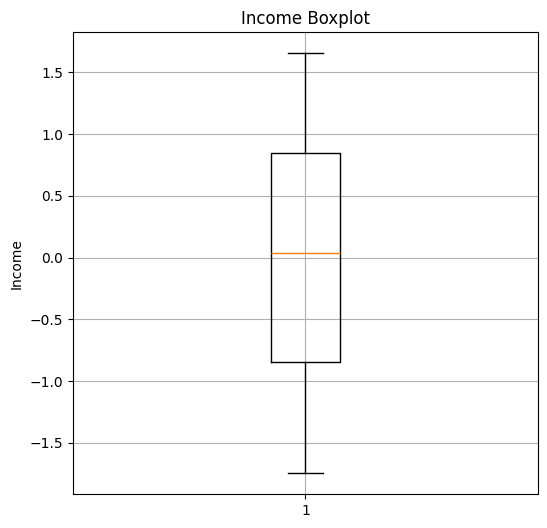

In [78]:
import matplotlib.pyplot as plt

# Visualization 3: Boxplot of 'income'
plt.figure(figsize=(6, 6))
plt.boxplot(df['income'])
plt.title('Income Boxplot')
plt.ylabel('Income')
plt.grid(True)
plt.show()

In [79]:
quant.correlation_matrix()

INFO:data_analysis.quant:Correlation matrix calculated


,age,income,salary
age,1.000000,-0.025156,-0.057415
income,-0.025156,1.000000,0.024745
salary,-0.057415,0.024745,1.000000


INFO:data_analysis.quant:Correlation matrix calculated


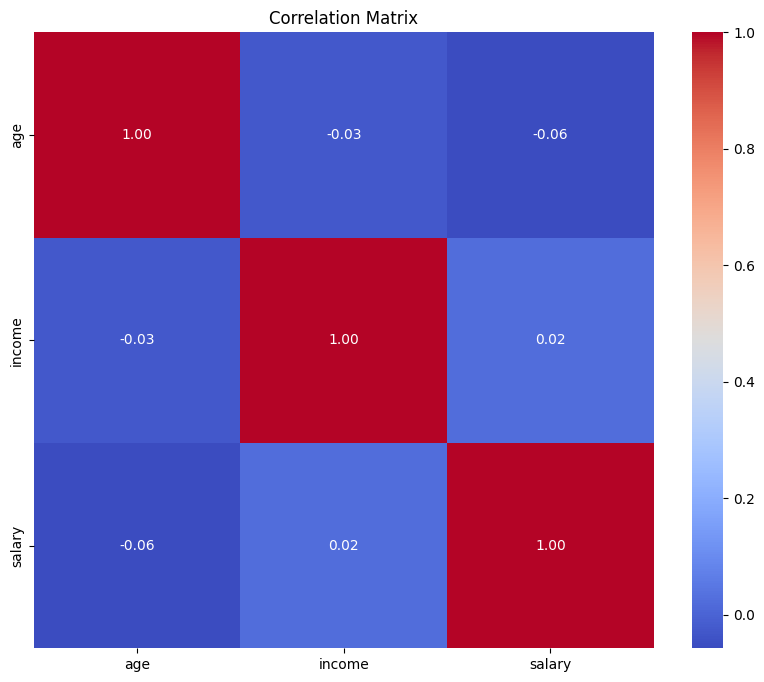

INFO:data_analysis.quant:Correlation matrix plotted


In [80]:
quant.plot_correlation_matrix()

In [81]:
quant.linear_regression('age', ['income', 'salary'])

INFO:data_analysis.quant:Linear regression performed


{'model': LinearRegression(),
 'predictions': array([-0.01996783,  0.02766863, -0.14067712,  0.01347228, -0.11393515,
        -0.15080574,  0.10940681, -0.03175652, -0.14692098,  0.05947334,
        -0.1236206 , -0.12798706, -0.09287595,  0.06508219, -0.01967154,
        -0.0382764 , -0.16160687, -0.14770089, -0.08378961, -0.06789662,
         0.05587171,  0.06556963, -0.09153619,  0.0873091 ,  0.01340916,
         0.02477337, -0.13681653,  0.00594968,  0.00768807,  0.05457056,
        -0.1118189 ,  0.08113299, -0.05030914, -0.12169411, -0.08509762,
        -0.10689839, -0.0665118 , -0.0296991 ,  0.08506861,  0.07622071,
        -0.00387078, -0.0685135 , -0.10931285, -0.12518644, -0.14648882,
        -0.10771179, -0.13389712, -0.07947637, -0.09237682, -0.05454619,
        -0.03429934, -0.11618958, -0.12780146, -0.03914095, -0.06656937,
         0.01267938,  0.05179637,  0.04488866, -0.12333176, -0.03892552,
        -0.11865205, -0.05001916,  0.05805071, -0.14740555,  0.07599237,
      

In [82]:
quant.hypothesis_testing('age', 'income')

INFO:data_analysis.quant:Hypothesis testing performed: t-test between age and income


{'statistic': -1.5888218580782547e-16, 'p_value': 0.9999999999999999}

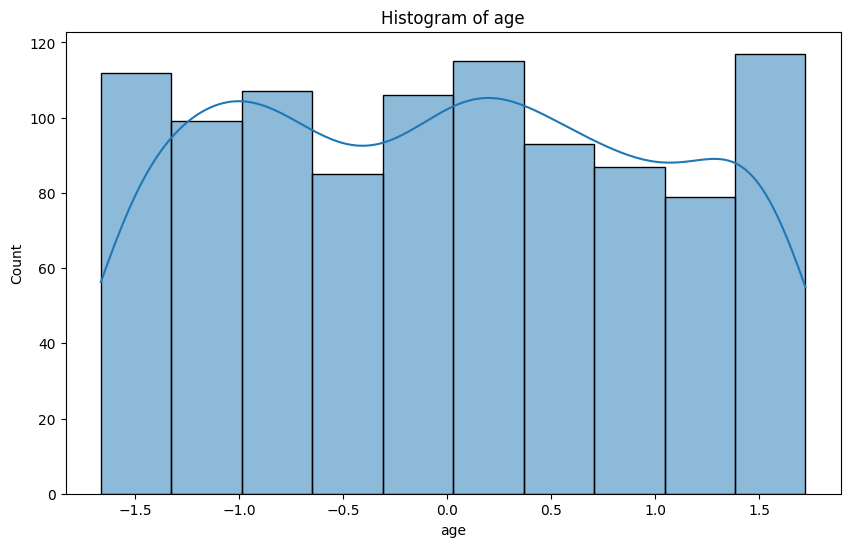

INFO:data_analysis.quant:Histogram plotted for column: age


In [83]:
quant.plot_histogram('age')

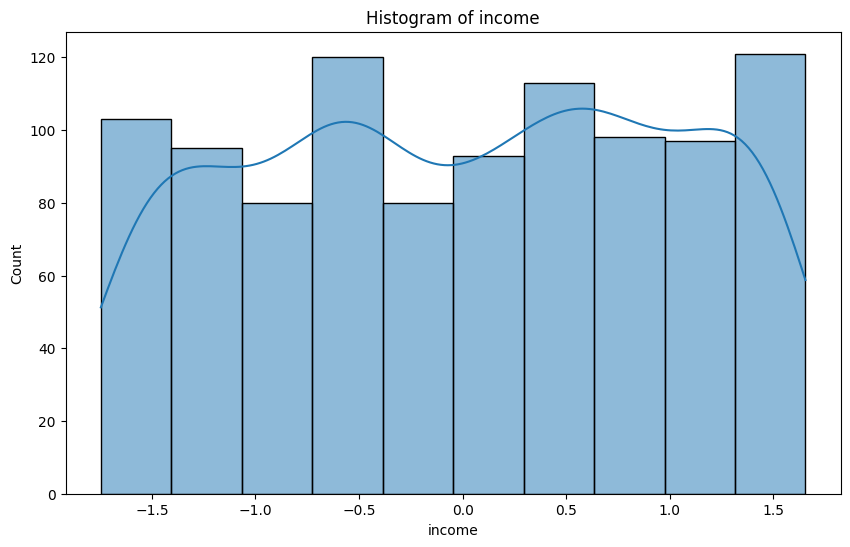

INFO:data_analysis.quant:Histogram plotted for column: income


In [84]:
quant.plot_histogram('income')

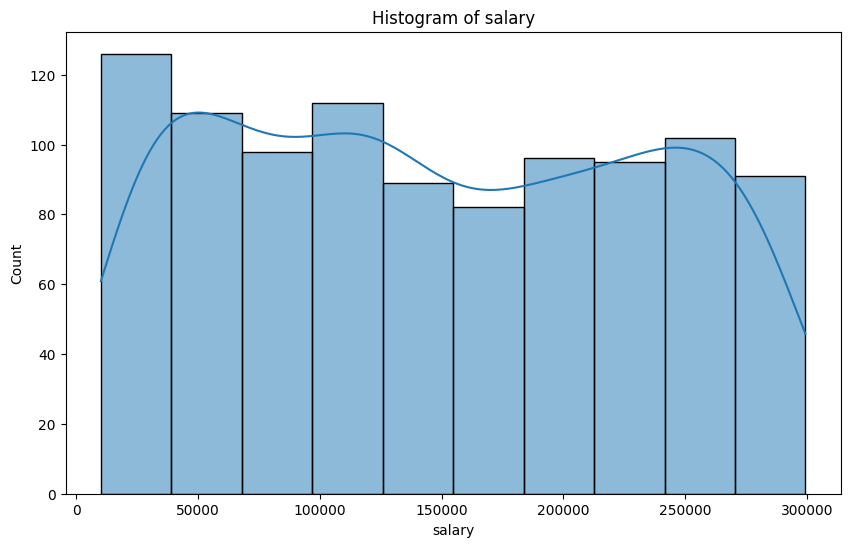

INFO:data_analysis.quant:Histogram plotted for column: salary


In [85]:
quant.plot_histogram('salary')

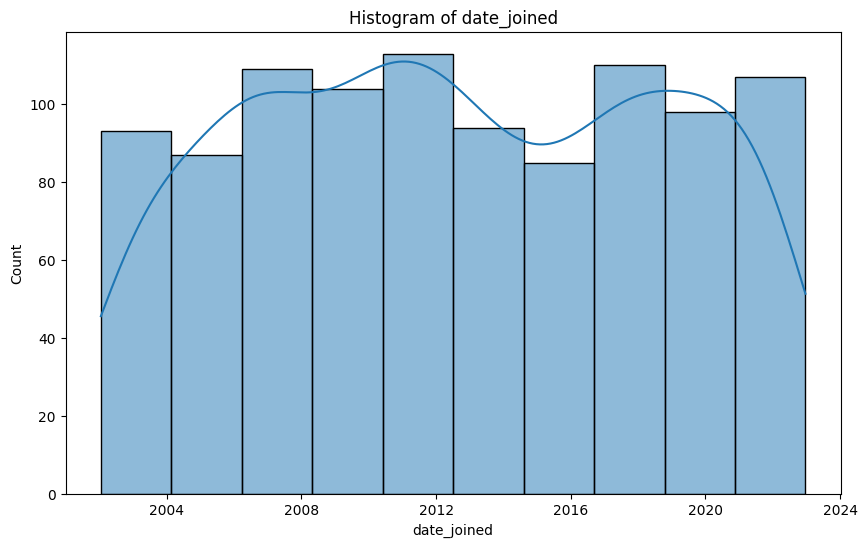

INFO:data_analysis.quant:Histogram plotted for column: date_joined


In [86]:
quant.plot_histogram('date_joined')

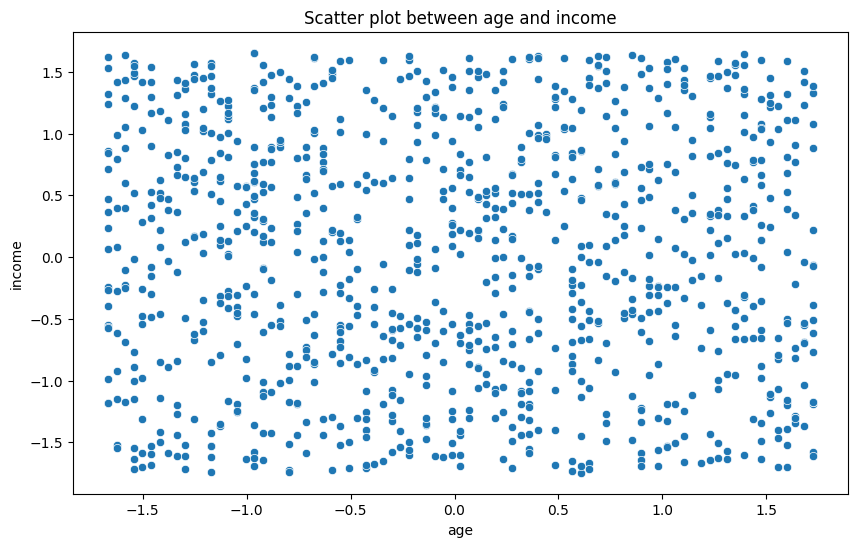

INFO:data_analysis.quant:Scatter plot plotted between age and income


In [87]:
quant.plot_scatter('age', 'income')

In [88]:
from data_analysis.qual import QualitativeAnalysis

In [89]:
qual = QualitativeAnalysis(cleaner.get_cleaned_data())

In [90]:
qual.sentiment_analysis('text')

INFO:data_analysis.qual:Sentiment analysis performed on column: text


,age,email,text,income,salary,date_joined,sentiment
0,1.515915,james82@example.org,Manage citizen late authority. Hit build sure ...,1.213555,103553.006514,2021-11-24 22:04:18.418217216,0.7717
1,-1.542031,sandra77@example.net,That under common history ability identify are...,-1.547088,247454.882654,2019-01-05 21:41:26.441247872,0.6705
2,1.557238,brodriguez@example.org,Behavior scientist feel American hope conditio...,-0.652842,223432.538520,2002-02-06 21:13:38.830846177,0.4404
3,-0.715559,danny47@example.com,Together move let administration green drive g...,0.890425,165302.084419,2019-04-16 17:52:30.675282944,0.2023
4,1.391944,hernandezbenjamin@example.net,Today fall different there. Day scientist marr...,1.154279,238604.931499,2006-09-03 11:37:36.082129248,0.2263
...,...,...,...,...,...,...,...
995,-1.459384,michaelpearson@example.org,Ten piece debate determine. Health various end...,-0.297998,100210.509245,2018-08-20 03:24:00.849923200,0.1779
996,0.565472,thomasdebbie@example.org,Cultural seat together wonder fly.\nBeautiful ...,-0.918398,276521.601112,2011-09-30 10:48:17.370251200,0.7964
997,0.152236,virginia96@example.org,Authority statement red role receive keep. Bea...,-0.536322,213542.212828,2005-07-01 04:34:29.940422368,0.6369
998,0.648119,jenna43@example.com,Life herself sing break approach.\nDespite oft...,0.097297,259387.479341,2011-05-31 14:10:22.904060992,-0.3612


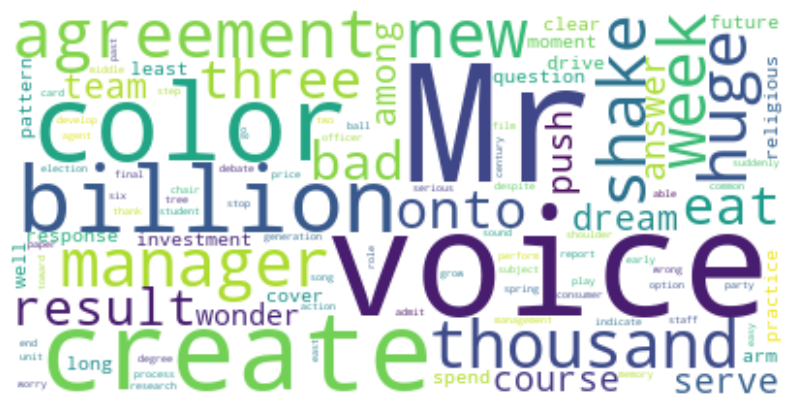

INFO:data_analysis.qual:Word cloud generated for column: text


In [91]:
qual.generate_wordcloud('text')

In [92]:
qual.keyword_extraction('text')

INFO:data_analysis.qual:Keyword extraction performed on column: text using tfidf method


,keyword,score
726,voice,8.437700
148,create,8.343118
126,color,8.122969
66,billion,7.681465
693,thousand,7.585146
20,agreement,7.509426
386,manager,7.478906
195,eat,7.379385
598,serve,7.368514
681,team,7.340209


In [93]:
from data_modeling.modeler import Modeler

In [94]:
modeler = Modeler(qual.get_qualitative_data())

In [95]:
X_train, X_test, y_train, y_test = modeler.train_test_split('sentiment', ['age', 'salary'])

INFO:modeler:Data split into train and test sets with test_size=0.2


In [96]:
lr = modeler.linear_regression(X_train, X_test, y_train, y_test)

INFO:modeler:Linear regression model trained and evaluated


In [97]:
lr_predictions = lr.get('predictions')

In [98]:
rf = modeler.random_forest_regressor(X_train, X_test, y_train, y_test)

INFO:modeler:Random forest regressor trained and evaluated


In [99]:
rf_predictions = rf.get('predictions')

In [100]:
rf_predictions

array([ 0.328671,  0.401439,  0.593509,  0.098796, -0.019847,  0.395548,
        0.014031,  0.289709,  0.538302,  0.246343, -0.086459, -0.109972,
        0.221351,  0.086688,  0.384644,  0.539523, -0.002371,  0.376595,
        0.352152, -0.069334, -0.141572,  0.172831,  0.312997,  0.09029 ,
        0.388028,  0.177823,  0.291675,  0.45605 ,  0.426993,  0.488969,
        0.497932,  0.365621,  0.186875,  0.218048,  0.308579,  0.435513,
        0.595364,  0.343891,  0.278315,  0.168659,  0.439806,  0.511447,
        0.170621,  0.245504, -0.201363,  0.378414,  0.482635,  0.256903,
        0.278196, -0.062777,  0.498014,  0.53269 ,  0.127853,  0.264389,
       -0.016509,  0.358581,  0.21429 , -0.007374, -0.064577,  0.506957,
        0.229794,  0.641424,  0.496487,  0.378653,  0.210123,  0.529197,
        0.745134,  0.435513,  0.250598,  0.39767 , -0.158076,  0.264137,
        0.418659,  0.164245,  0.224284, -0.025844,  0.629215,  0.611157,
        0.28551 , -0.058609,  0.097917,  0.279689, 

In [101]:
lr_predictions = pd.Series(lr_predictions)
rf_predictions = pd.Series(rf_predictions)
joined_predictions = pd.concat([lr_predictions, rf_predictions], axis=1)

In [102]:
# add original income values
joined_predictions['sentiment'] = y_test
joined_predictions['age'] = X_test['age']
joined_predictions['salary'] = X_test['salary']

In [103]:
from data_modeling.visualizer import Visualizer

In [104]:
visualizer = Visualizer(joined_predictions)

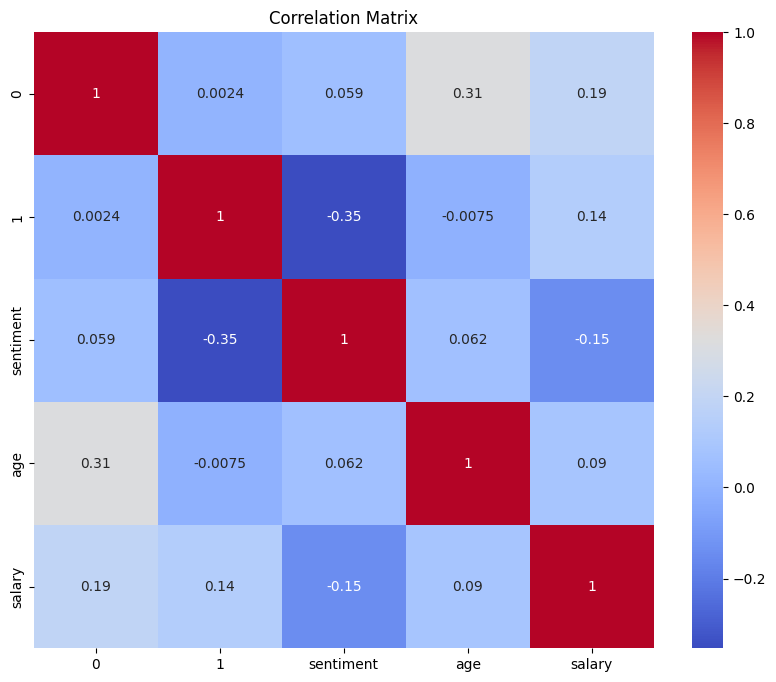

In [105]:
visualizer.plot_correlation_matrix()


In [106]:
visualizer.plot_3d_scatter('age', 'salary', 'sentiment', color='sentiment')

<Figure size 1000x600 with 0 Axes>

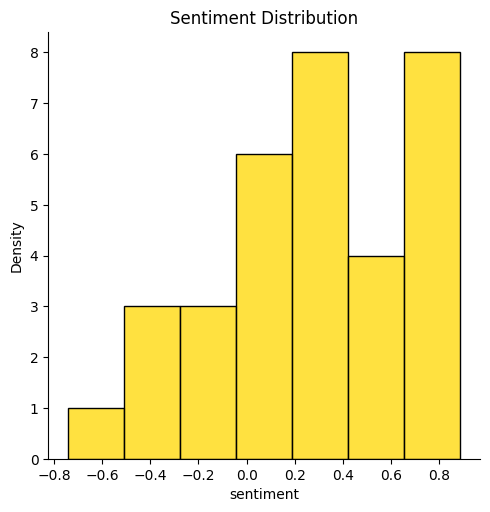

In [107]:
visualizer.plot_distribution(column='sentiment', color='gold', title='Sentiment Distribution')

In [108]:
results = core.query_data(query='SELECT * FROM generated_data')
print(results)

INFO:plato:Database connection created with data.db
INFO:plato:Query executed: SELECT * FROM generated_data
INFO:plato:Query executed successfully.
INFO:plato:Database connection closed
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [109]:
results = core.query_data(query='SELECT COUNT(DISTINCT age) FROM generated_data')
print(results)


INFO:plato:Database connection created with data.db
INFO:plato:Query executed: SELECT COUNT(DISTINCT age) FROM generated_data
INFO:plato:Query executed successfully.
INFO:plato:Database connection closed


[(83,)]


In [110]:
results = core.query_data(query='SELECT AVG(salary) FROM generated_data')
print(results)

INFO:plato:Database connection created with data.db
INFO:plato:Query executed: SELECT AVG(salary) FROM generated_data
INFO:plato:Query executed successfully.
INFO:plato:Database connection closed


[(154892.08384899978,)]
